<a href="https://colab.research.google.com/github/mariajuliapessoa/Tratamento-de-dados-Titanic/blob/main/MARIA_JULIA_PESSOA_CUNHA_ML_Pratica_01_Tratamento_de_Dados_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática 01 - Tratamento de Dados - Preparação de Dados para Machine Learning


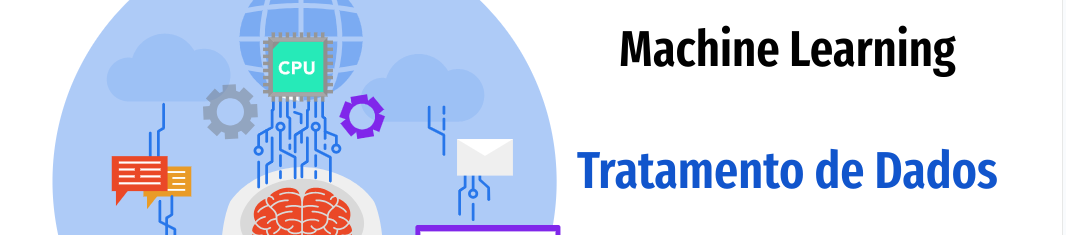


- INSIRA SEU NOME AQUI! (mjpc@cesar.school)

**Objetivo da Prática**

```
O objetivo desta prática é consolidar os conceitos de tratamentos de dados vistos em sala de aula. Em breve, iremos montar modelo(s) de Machine Learning; desta forma, precisamos garantir que os dados de entrada deste(s) modelo(s) estejam aceitáveis e organizados da forma correta.
```

**Instruções para a prática.**

1. Usar o dataset informado na célula `definição das libraries/dataset`, **NÃO** usar outro dataset do Titanic carregado ou outro link da Internet.

2. Realizar as etapas nas correspondentes células, contendo instruções/dicas e a respectiva pontuação da prática.

3. Submeter no Classroom até a data limite. Após o prazo limite, punição de 20 pontos por dia de atraso.
  *   Todos os códigos irão ser submetidos numa ferramenta de plágio, questões/códigos com plágio detectado serão atribuídos nota zero na respectiva questão. *Foque a discussão com sua dupla!*

4. Use o chatGPT com moderação. Ele não acerta sempre não viu? 😅

5. Sinta-se a vontade para adicionar células de texto/código, porém não apague as que são da estrutura da prática (numeração/divisão das partes).


In [ ]:
# Celula de definicao das libraries/dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importe outras libraries que vc ira usar aqui!

# NAO ALTERAR ESTA DEFINICAO DE DATASET/OBJETO
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')


## Parte I - Análise Exploratória dos Dados  (AED)

**Pontuação: 20 pontos**

Realize a análise exploratória do conjunto de dados do Titanic, isto é, procure padrões, insights e observações sobre os dados. Após realizar a AED, indique dois insights (descobertas) sobre o conjunto de dados.

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<ipython-input-139-394f1e27dd02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic.corr()


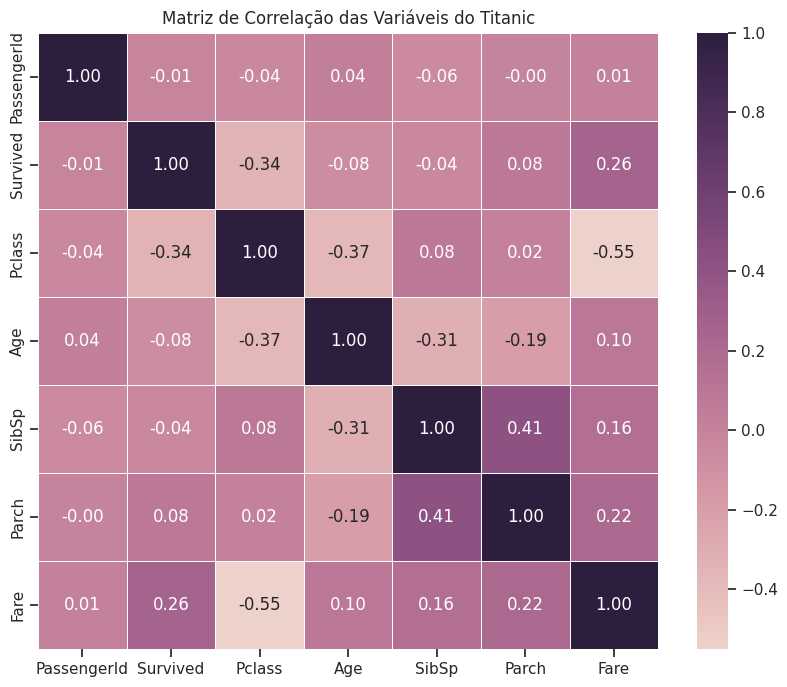

In [ ]:
correlation_matrix = titanic.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis do Titanic')
plt.show()

Matriz correlação

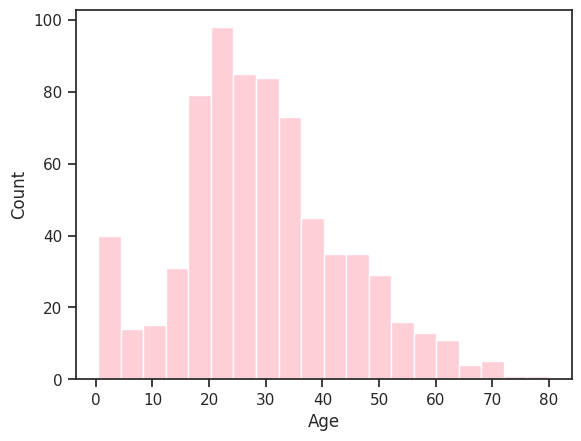

In [ ]:
sns.histplot(titanic['Age'].dropna(), bins=20, kde=False, color = 'pink')
plt.show()


Distribuindo as idades através de um histograma

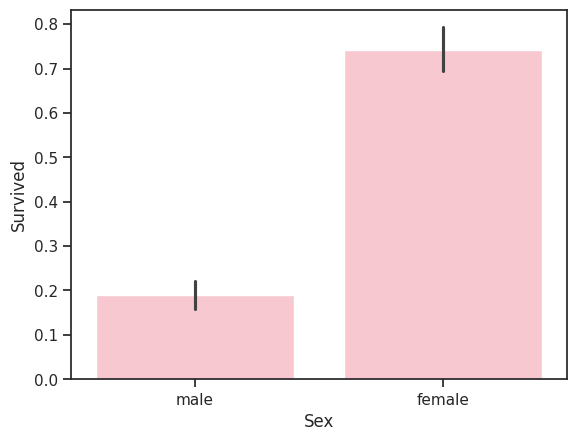

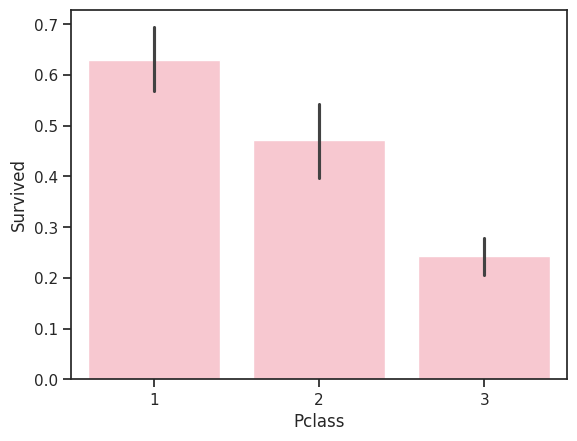

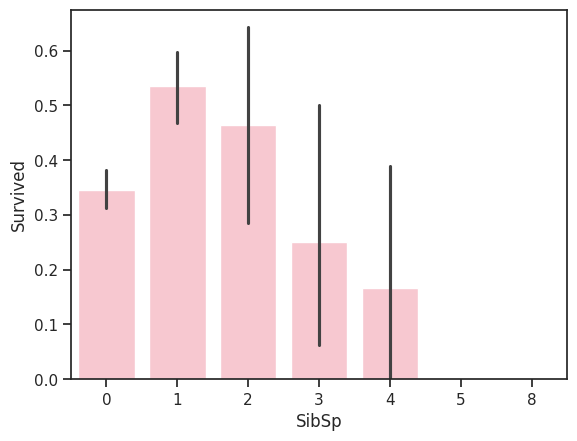

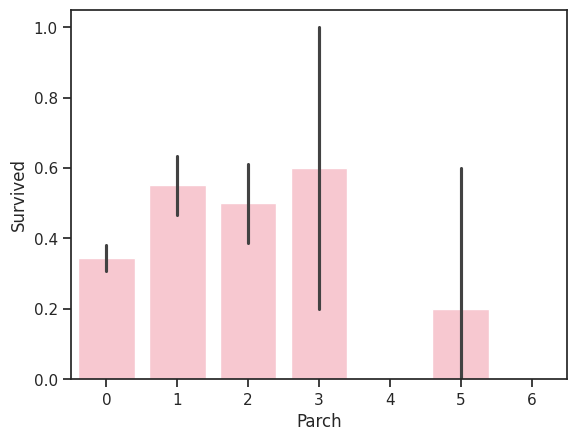

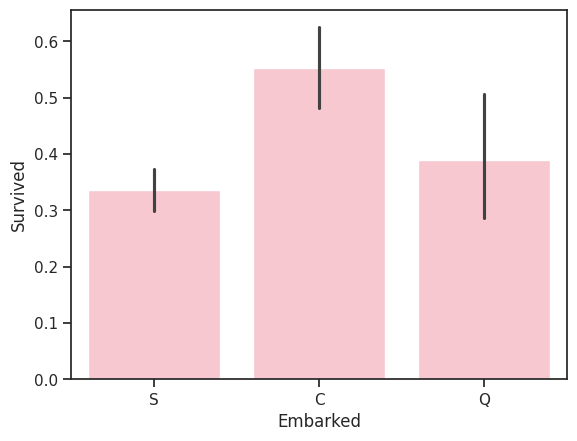

In [ ]:
sns.barplot(x='Sex', y='Survived', data = titanic, color = 'pink')
plt.show()
sns.barplot(x='Pclass', y='Survived', data = titanic, color = 'pink')
plt.show()
sns.barplot(x='SibSp', y='Survived', data = titanic, color = 'pink')
plt.show()
sns.barplot(x='Parch', y='Survived', data = titanic, color = 'pink')
plt.show()
sns.barplot(x='Embarked', y='Survived', data = titanic, color = 'pink')
plt.show()

Gráficos de visualização dos dados categóricos, fazendo análise de sobrevivência através de suas colunas

### Insight 01 -

In [ ]:
# Mostre codigos aqui referentes ao seu insight, mas lembre de descrever na celula de texto o mesmo.
# Uma analise de dados se torna completa quando temos texto e informacoes descritas em formas de imagem.

<ipython-input-143-490001ccca44>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.catplot(x="Sex", hue="Survived", col="Pclass", data=titanic, kind="count", height=4, aspect=0.7, color = 'pink')


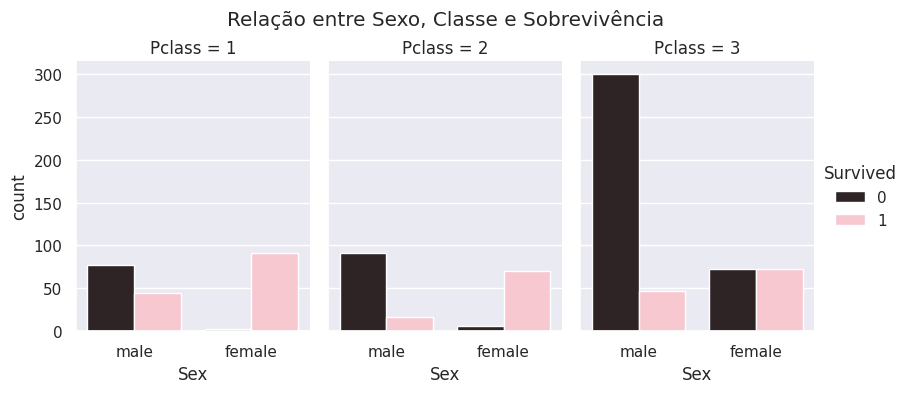

In [ ]:
#relação entre Sex, Pclasse e Survived
sns.set(style="darkgrid")
sns.catplot(x="Sex", hue="Survived", col="Pclass", data=titanic, kind="count", height=4, aspect=0.7, color = 'pink')
plt.subplots_adjust(top=0.85)
plt.suptitle('Relação entre Sexo, Classe e Sobrevivência')
plt.show()

<ipython-input-144-266102202531>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.catplot(x="Survived", y="Age", hue="Sex", kind="swarm", data=titanic, height=6, aspect=1.5, color = 'pink')


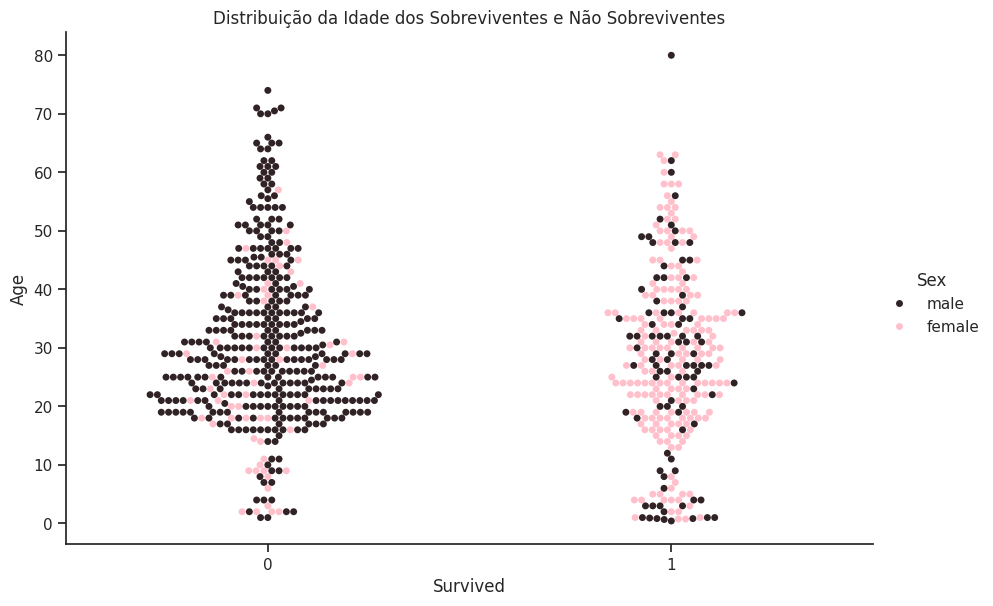

In [ ]:
sns.set(style="ticks")

sns.catplot(x="Survived", y="Age", hue="Sex", kind="swarm", data=titanic, height=6, aspect=1.5, color = 'pink')
plt.title('Distribuição da Idade dos Sobreviventes e Não Sobreviventes')
plt.show()

É notável o desbalanceamento significativo entre as classes dos passageiros e entre os gêneros, com a maioria dos passageiros na 3ª classe e a predominância do sexo masculino, remetando à frase do filme: "Crianças e mulheres primeiro". Dessa forma, sugere a importância da classe social e do gênero para a sobrevivência no desastre do Titanic,

### Insight 02 -

<ipython-input-145-c2c09a245eaa>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(data=titanic, x='SibSp', hue='Pclass', color = 'pink')


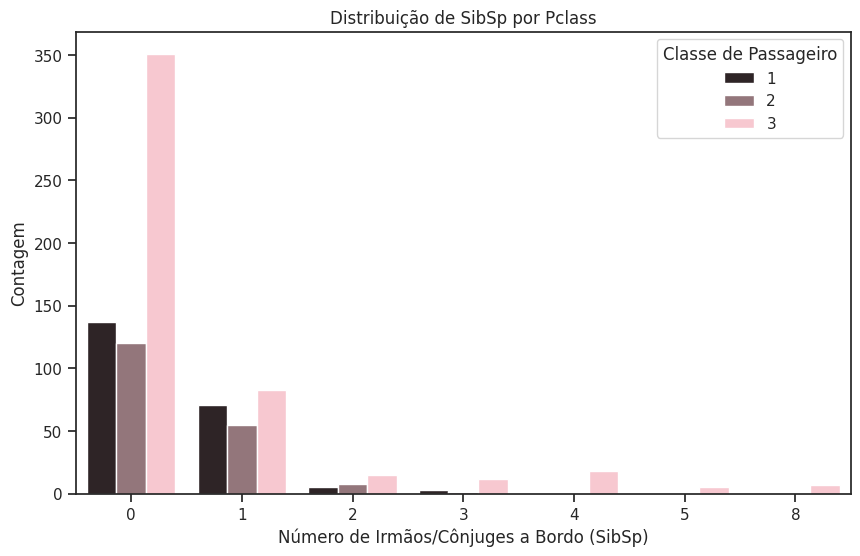

In [ ]:
# Distribuindo o número de acompanhantes (Sibsp) por classe de passageiro (Pclass)
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='SibSp', hue='Pclass', color = 'pink')
plt.title('Distribuição de SibSp por Pclass')
plt.xlabel('Número de Irmãos/Cônjuges a Bordo (SibSp)')
plt.ylabel('Contagem')
plt.legend(title='Classe de Passageiro')
plt.show()

Esse gráfico nos permite observar como o número de irmãos/cônjuges a bordo é distribuído entre as diferentes classes de passageiro. O insight que podemos obter é se há alguma diferença na distribuição de irmãos/cônjuges a bordo entre as classes de passageiro. Isso poderia indicar diferentes padrões de viagem ou preferências de família entre os passageiros de diferentes classes.

## Parte II - Tratamento dos Dados

**Pontuação: 50 pontos**

Realize a limpeza dos dados seguindo os próximos tópicos.

### Realize a limpeza do Dataset

In [ ]:
# Note que temos algumas colunas que estao com muitos dados ausentes. Sera que podemos substituir eles de alguma forma?

In [ ]:
# --->> Tente propor alguma forma de nao perder tantos dados ausentes. <<<----------

In [ ]:
median_age = titanic['Age'].median()
titanic['Age'].fillna(median_age, inplace=True)

# Imputação do porto de embarque (Embarked)
mode_embarked = titanic['Embarked'].mode()[0]
titanic['Embarked'].fillna(mode_embarked, inplace=True)

print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64




Utilizamos a mediana das idades para preservar a distribuição geral delas, uma vez que dados nulos perdem seu impacto consideravelmente.
Já com a coluna de embarcados, como há somente dois valores ausentes em todo o dataset, é possível substituí-los pela moda da coluna sem que haja tanta perda de informação.

### Exiba algumas informações úteis sobre o tipo de dados e valores nulos

In [ ]:
#Conjunto de dados geral
titanic_desc = titanic.describe()

# Contando as colunas com dados categóricos
survived_count = titanic['Survived'].value_counts()
pclass_count = titanic['Pclass'].value_counts()
sex_count = titanic['Sex'].value_counts()
print("\n\n")

# Checando a quantidade de valores nulos
missing_values = titanic.isnull().sum()

titanic_desc, survived_count, pclass_count, sex_count, missing_values

(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  891.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.361582    0.523008   
 std     257.353842    0.486592    0.836071   13.019697    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   22.000000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   35.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  ,
 0    549
 1    342
 Name: Survived, dtype: int64,
 3    491


### Remova colunas que voce considera que não serão úteis para uma analise.

Considere que queremos descobrir se uma pessoa (instância de dado) sobreviveu ou não ao acidente do Titanic, desta forma, remova colunas que não serão úteis para este objetivo.

In [ ]:
titanic_cleaned = titanic.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1)

In [ ]:
print(titanic_cleaned.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


As colunas acima foram removidas visto que se tratavam de informações pessoais apenas, sendo considerados valores únicos que não seriam relevantes ao levantar uma análise geral a cerca dos passageiros sobreviventes

Além disso, também removemos a coluna Fare, pois não pensamos em usá-la para insights e seus dados estavam em float:

In [ ]:
titanic.drop('Fare', axis=1, inplace=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S


### Realize uma Análise básica das colunas restantes

Para a análise, vamos examinar a distribuição da tarifa (Fare), a relação entre sobrevivência e classe do passageiro (Pclass), sobrevivência e sexo (Sex), e a distribuição da idade (Age).

Relação entre Sobrevivência e Classe do Passageiro (Pclass): Com o gráfico de barras podemos mostrar a proporção de sobreviventes em cada classe.

<ipython-input-154-ea3cf75fada9>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(x='Pclass', hue='Survived', data=titanic, color = 'pink')


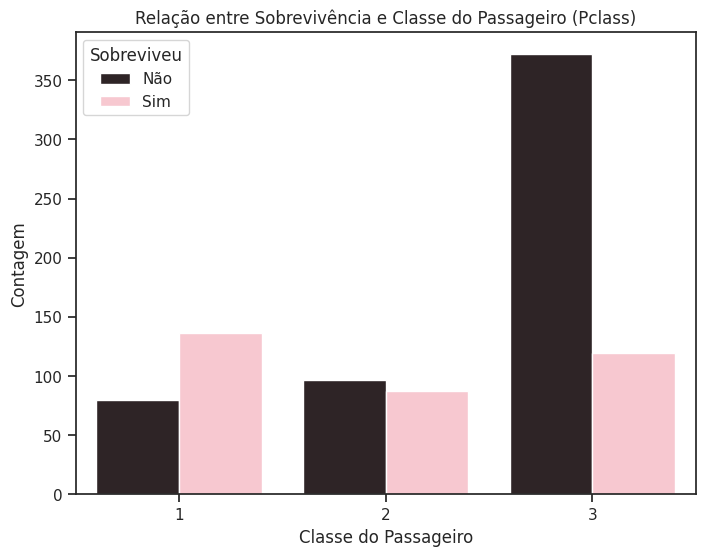

In [ ]:
# Visualizar a relação entre sobrevivência e classe do passageiro (Pclass)
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic, color = 'pink')
plt.title('Relação entre Sobrevivência e Classe do Passageiro (Pclass)')
plt.xlabel('Classe do Passageiro')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

Relação entre Sobrevivência e Classe do Passageiro (Pclass): Podemos usar um gráfico de barras para mostrar a proporção de sobreviventes em cada classe.


<ipython-input-155-a8bfc383688e>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(x='Sex', hue='Survived', data=titanic, color = 'pink')


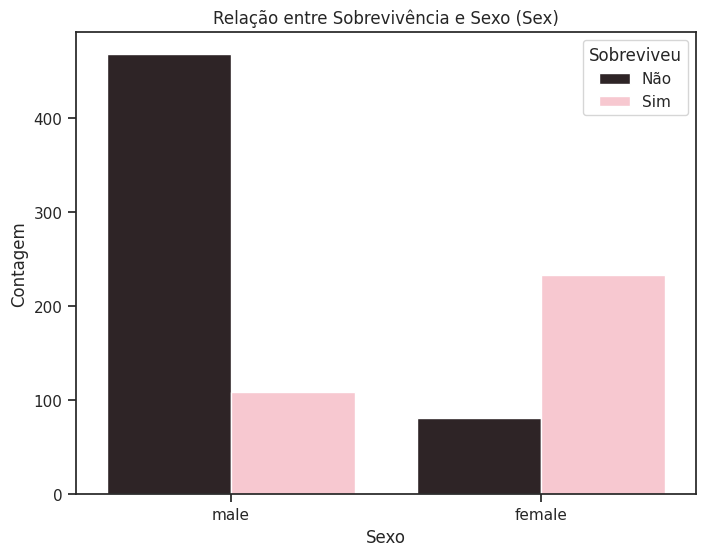

In [ ]:
# Visualizar a relação entre sobrevivência e sexo (Sex)
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic, color = 'pink')
plt.title('Relação entre Sobrevivência e Sexo (Sex)')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

Relação entre Sobrevivência e Sexo (Sex): Também podemos usar um gráfico de barras para mostrar a proporção de sobreviventes por sexo.

<ipython-input-156-8987b1bf2e2d>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(x='Sex', hue='Survived', data=titanic, color = 'pink')


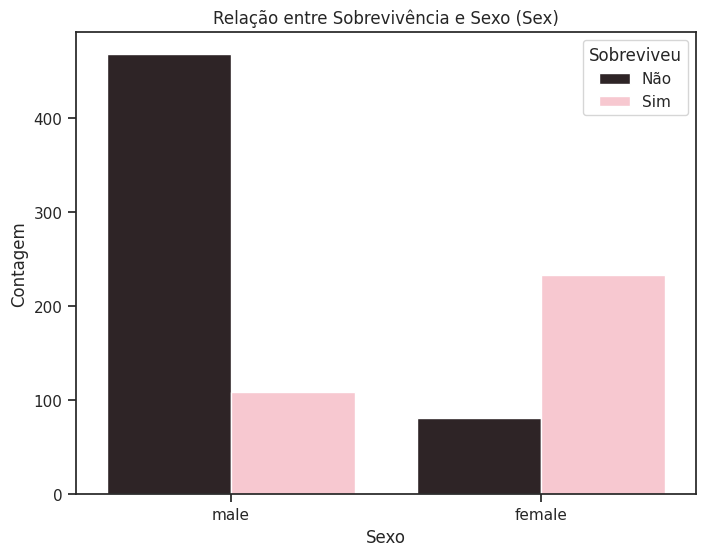

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic, color = 'pink')
plt.title('Relação entre Sobrevivência e Sexo (Sex)')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

Distribuição da Idade (Age): Podemos usar um histograma para visualizar a distribuição da idade.

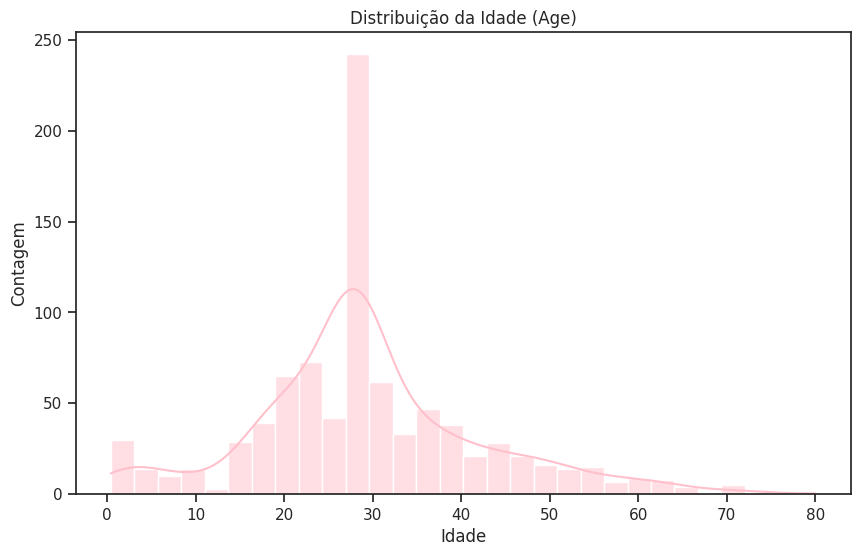

In [ ]:
# Visualizar a distribuição da idade (Age)
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True, color = 'pink')
plt.title('Distribuição da Idade (Age)')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

### Transforme os atributos para a possível criação de um modelo de ML

Nas entradas dos modelos de ML não podemos lidar com dados que são textuais/caracteres, dessa forma, proponha alguma forma de transformar estes tipos de dados.

Para transformar os dados categóricos em numéricos, usaremos codificação. Podemos transformar a coluna Sex em uma coluna numérica onde male = 0 e female = 1. Para Embarked, que tem três categorias, substituimos S por 1, Q por 2 e C por 3. Dessa forma:



Para a coluna Sex:

In [ ]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

Para a coluna Embarked:

In [ ]:
titanic['Embarked'].replace({'S': 1, 'Q': 2, 'C': 3}, inplace=True)

Dataset após as alterações:


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,C85,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,NaN,1


## Parte III - Pré-processamento dos Dados

**Pontuação: 30 pontos**

Suponha que na próxima prática iremos avaliar modelos de Machine Learning com este dataset. Dessa forma, realize a etapa de pré-processamento. Nosso objetivo aqui será preparar e organizar os dados de entrada de forma que possam ser utilizados de maneira eficaz pelos algoritmos de aprendizado de máquina.

### Separe os dados em conjuntos de treinamento e teste

Sugestao de nomenclatura:

- X_train: dados para construcao de um futuro modelo.
- X_test:  dados para testar um futuro modelo.
- y_train: label para os dados referentes ao conjunto de treinamento.
- y_test:  label para os dados referentes ao conjunto de teste.

In [ ]:
# Tarefa (1) - Separe os dados em conjuntos de treinamento e teste

# 75% dos dados para o conjunto de [TREINAMENTO]
# 25% dos dados para o conjunto de [TESTE]

In [ ]:
titanic_cleaned = titanic.copy()

In [ ]:
# Separar os dados em features (X) e target (y)
X = titanic_cleaned.drop('Survived', axis=1)
y = titanic_cleaned['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-165-74745cb8624d>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(data=titanic_cleaned, x='Survived', hue='Sex', color = 'pink')


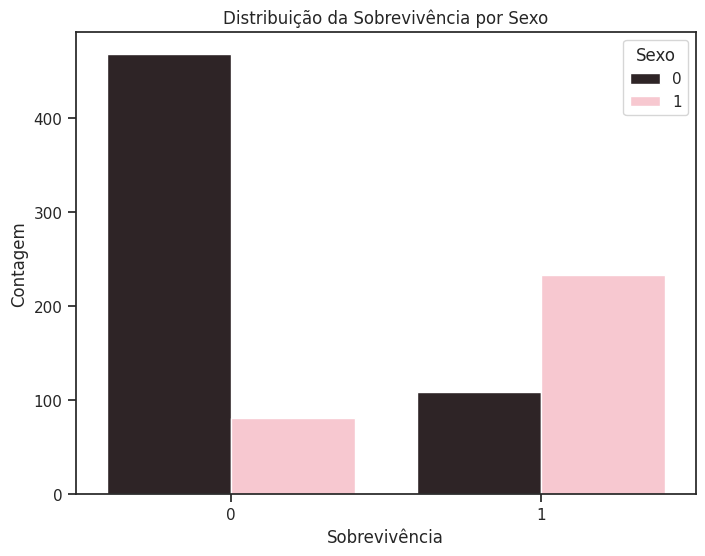

In [ ]:
# Plotar a distribuição da sobrevivência por sexo
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_cleaned, x='Survived', hue='Sex', color = 'pink')
plt.title('Distribuição da Sobrevivência por Sexo')
plt.xlabel('Sobrevivência')
plt.ylabel('Contagem')
plt.legend(title='Sexo')
plt.show()

In [ ]:
# Exibir o número de amostras em cada conjunto
print("Número de amostras no conjunto de treinamento:", X_train.shape[0])
print("Número de amostras no conjunto de teste:", X_test.shape[0])

Número de amostras no conjunto de treinamento: 712
Número de amostras no conjunto de teste: 179


### Realize o Pré-processamento dos dados

**Realize o grafico para alguma das colunas (features) antes e depois da etapa de pré-processamento.**

In [ ]:
# Tarefa (2) - Utilize alguma tecnica de pre-processamento
# Sugestoes: padronizar os dados de alguma forma

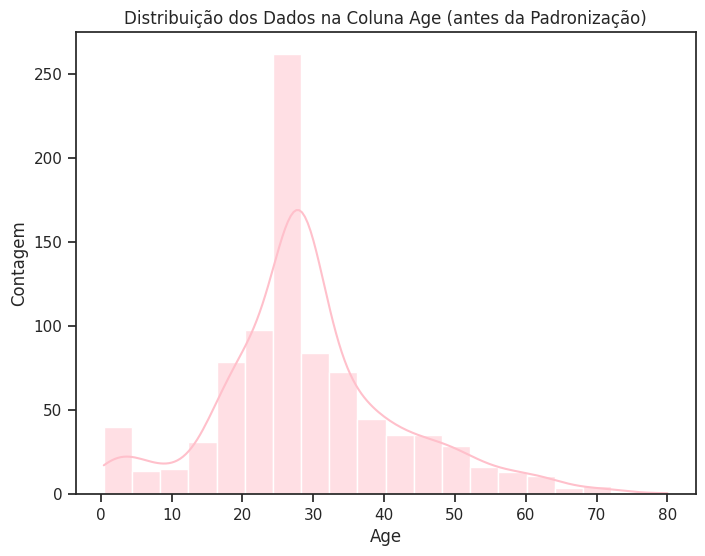

In [ ]:
# Visualizar a distribuição dos dados na coluna 'Age' antes da padronização
plt.figure(figsize=(8, 6))
sns.histplot(titanic_cleaned['Age'].dropna(), bins=20, kde=True, color = 'pink')
plt.title('Distribuição dos Dados na Coluna Age (antes da Padronização)')
plt.xlabel('Age')
plt.ylabel('Contagem')
plt.show()


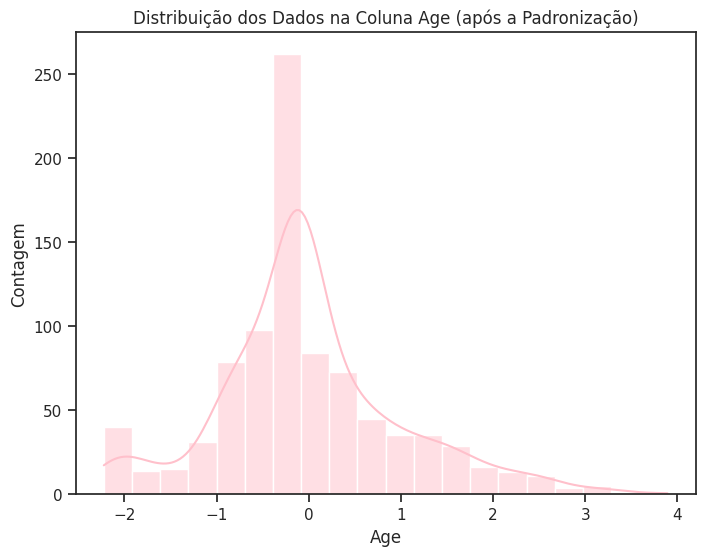

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instanciar o objeto StandardScaler
scaler = StandardScaler()

# Padronizar os dados na coluna 'Age'
titanic_cleaned['Age'] = scaler.fit_transform(titanic_cleaned['Age'].values.reshape(-1, 1))

# Visualizar a distribuição dos dados na coluna 'Age' após a padronização
plt.figure(figsize=(8, 6))
sns.histplot(titanic_cleaned['Age'], bins=20, kde=True, color = 'pink')
plt.title('Distribuição dos Dados na Coluna Age (após a Padronização)')
plt.xlabel('Age')
plt.ylabel('Contagem')
plt.show()


In [ ]:
# Tarefa (3) - Indique os dados finais nas seguintes variaveis:
# X_train -- dados para construcao de um futuro modelo.
# X_test  -- dados para testar um futuro modelo.
# y_train -- label para os dados referentes ao conjunto de treinamento.
# y_test  -- label para os dados referentes ao conjunto de teste.

Dados finais nas seguintes variáveis:

In [ ]:
X_train = titanic_cleaned.drop(['Survived', 'Age'], axis=1)
X_test = titanic_cleaned.drop(['Survived', 'Age'], axis=1)
y_train = titanic_cleaned['Survived']
y_test = titanic_cleaned['Survived']

# Prints
print("Conjunto de treinamento - X_train:")
print(X_train.head(5))
print("\nConjunto de teste - X_test:")
print(X_test.head(5))
print("\nLabels para o conjunto de treinamento - y_train:")
print(y_train.head(5))
print("\nLabels para o conjunto de teste - y_test:")
print(y_test.head(5))

Conjunto de treinamento - X_train:
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex  SibSp  Parch            Ticket Cabin  Embarked  
0    0      1      0         A/5 21171   NaN         1  
1    1      1      0          PC 17599   C85         3  
2    1      0      0  STON/O2. 3101282   NaN         1  
3    1      1      0            113803  C123         1  
4    0      0      0            373450   NaN         1  

Conjunto de teste - X_test:
   PassengerId  Pclass                                               Name  \
0            1       3                            Brau